  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=d09b720b482fda0e7bab968ad2659d2f6c802dec6c16371ea890a5bbc0fbbbb4
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built MiniSom


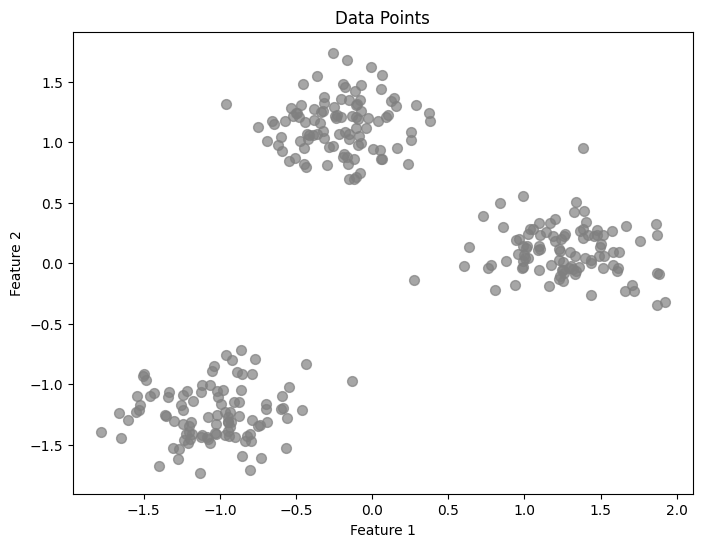

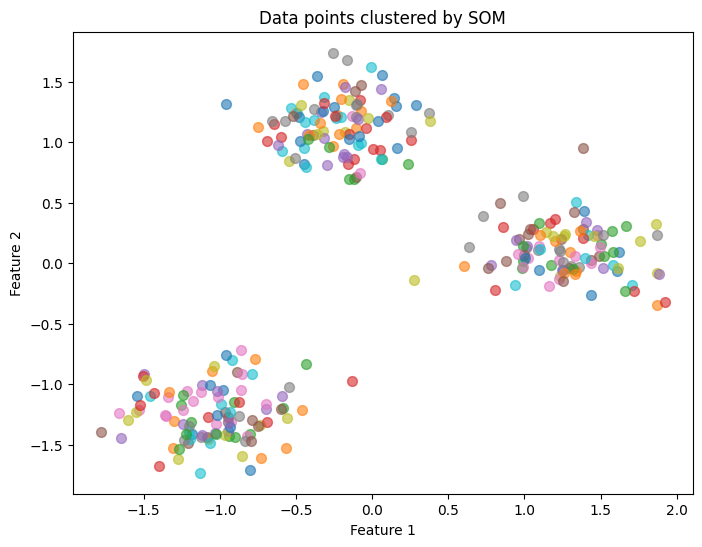

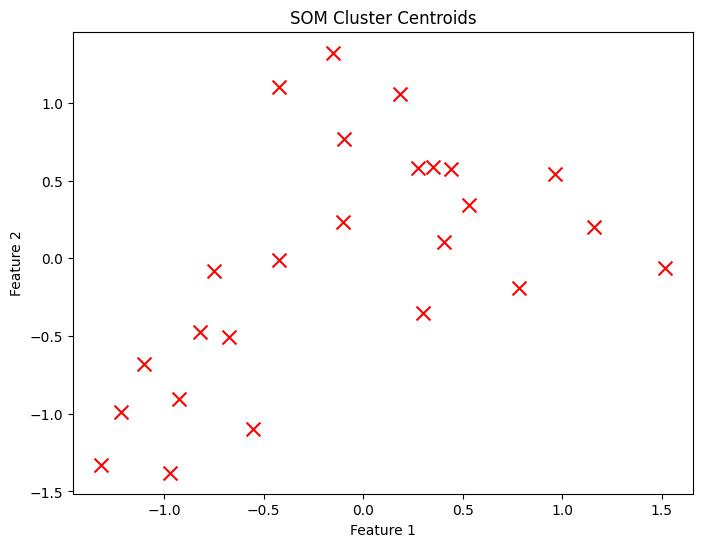

Silhouette Score: 0.29157662230298287
Davies-Bouldin Score: 0.8711109793657198


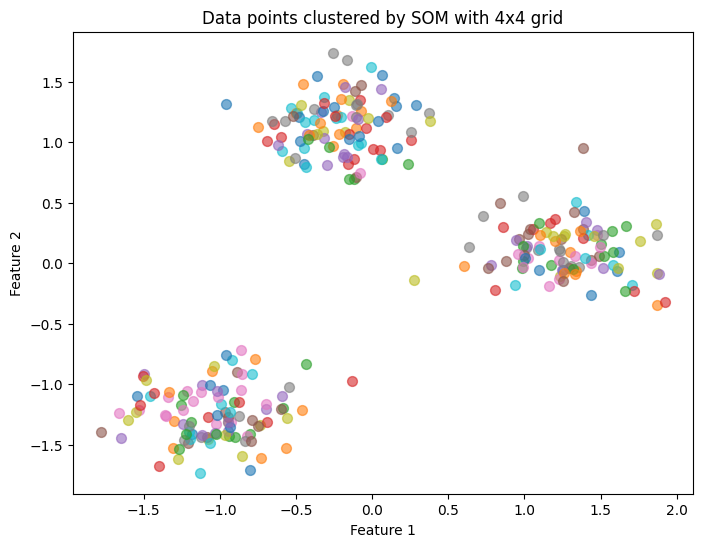

For 4x4 grid - Silhouette Score: 0.2849830570406557
For 4x4 grid - Davies-Bouldin Score: 0.8263047299219912


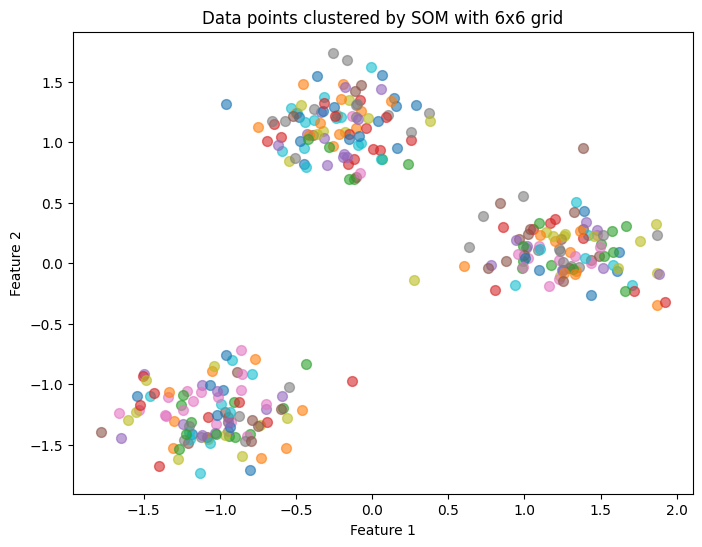

For 6x6 grid - Silhouette Score: 0.275760675622043
For 6x6 grid - Davies-Bouldin Score: 0.8232646596870572


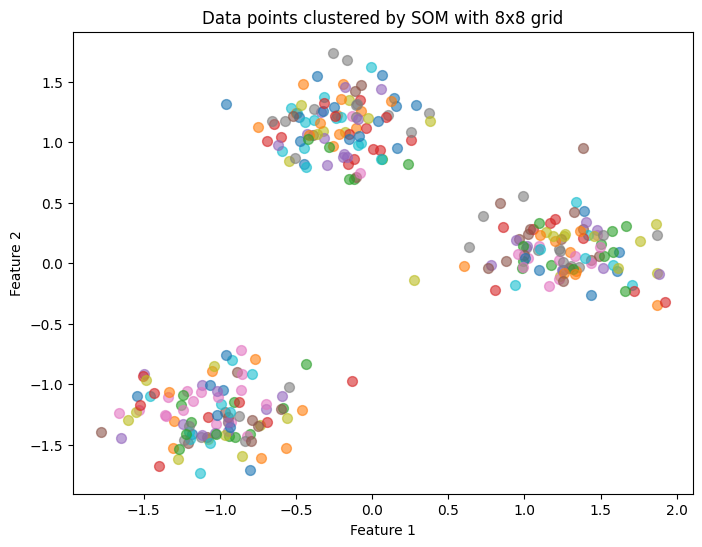

For 8x8 grid - Silhouette Score: 0.220044172509519
For 8x8 grid - Davies-Bouldin Score: 0.7554376375958592


In [ ]:
# Install the MiniSom library
!pip install MiniSom

# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from minisom import MiniSom

# Step 1: Generate a synthetic dataset
# Generating a dataset with 3 clusters for testing purposes
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.5)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 2: Preprocessing (Standardizing the dataset)
# Already performed standardization with StandardScaler
# Note: No target variable removal is necessary, as we created a dataset without one.

# Step 3: Scatter plot of data points to visualize initial distribution
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.7, s=50)
plt.title("Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 4: Apply Self-Organizing Map (SOM) for clustering
# Initializing SOM parameters
som_grid_rows, som_grid_columns = 5, 5  # 5x5 grid
som = MiniSom(x=som_grid_rows, y=som_grid_columns, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize SOM weights and train
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

# Step 5: Determine optimal number of clusters using U-Matrix visualization
# For simplicity, we use the SOM grid as clusters
# Label each data point according to the nearest SOM node (BMU)
mapped_data = np.array([som.winner(x) for x in X])
unique_clusters = np.unique(mapped_data, axis=0)

# Plotting the clusters
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(mapped_data):
    plt.scatter(X[i, 0], X[i, 1], label=f"Cluster {(x, y)}", s=50, alpha=0.6)
plt.title("Data points clustered by SOM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 6: Plot cluster centroids (SOM weights)
weights = som.get_weights()
plt.figure(figsize=(8, 6))
for i in range(som_grid_rows):
    for j in range(som_grid_columns):
        plt.scatter(weights[i, j][0], weights[i, j][1], s=100, marker='x', c='red')
plt.title("SOM Cluster Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 7: Measure performance using silhouette score and Davies-Bouldin score
# Calculating labels based on SOM clusters
labels = np.array([np.ravel_multi_index(som.winner(x), (som_grid_rows, som_grid_columns)) for x in X])
silhouette = silhouette_score(X, labels)
db_score = davies_bouldin_score(X, labels)

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Score:", db_score)

# Step 8: Loop for 'n' clusters (optional customization)
# Adjusting grid size for increased clusters
for n_clusters in [4, 6, 8]:  # Testing with different SOM grid sizes for more clusters
    som = MiniSom(x=n_clusters, y=n_clusters, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)
    som.random_weights_init(X)
    som.train_random(data=X, num_iteration=100)

    # Map data to the new SOM
    mapped_data = np.array([som.winner(x) for x in X])
    labels = np.array([np.ravel_multi_index(som.winner(x), (n_clusters, n_clusters)) for x in X])

    # Plot clusters for new grid size
    plt.figure(figsize=(8, 6))
    for i, (x, y) in enumerate(mapped_data):
        plt.scatter(X[i, 0], X[i, 1], label=f"Cluster {(x, y)}", s=50, alpha=0.6)
    plt.title(f"Data points clustered by SOM with {n_clusters}x{n_clusters} grid")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

    # Performance metrics
    silhouette = silhouette_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    print(f"For {n_clusters}x{n_clusters} grid - Silhouette Score:", silhouette)
    print(f"For {n_clusters}x{n_clusters} grid - Davies-Bouldin Score:", db_score)



To use a synthetic dataset for clustering, we’ll use scikit-learn’s `make_blobs` function. The SOM implementation will utilize the `MiniSom` library.

```python
# Install the MiniSom library
!pip install MiniSom

# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from minisom import MiniSom

# Step 1: Generate a synthetic dataset
# Generating a dataset with 3 clusters for testing purposes
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.5)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 2: Preprocessing (Standardizing the dataset)
# Already performed standardization with StandardScaler
# Note: No target variable removal is necessary, as we created a dataset without one.

# Step 3: Scatter plot of data points to visualize initial distribution
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.7, s=50)
plt.title("Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 4: Apply Self-Organizing Map (SOM) for clustering
# Initializing SOM parameters
som_grid_rows, som_grid_columns = 5, 5  # 5x5 grid
som = MiniSom(x=som_grid_rows, y=som_grid_columns, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize SOM weights and train
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

# Step 5: Determine optimal number of clusters using U-Matrix visualization
# For simplicity, we use the SOM grid as clusters
# Label each data point according to the nearest SOM node (BMU)
mapped_data = np.array([som.winner(x) for x in X])
unique_clusters = np.unique(mapped_data, axis=0)

# Plotting the clusters
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(mapped_data):
    plt.scatter(X[i, 0], X[i, 1], label=f"Cluster {(x, y)}", s=50, alpha=0.6)
plt.title("Data points clustered by SOM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 6: Plot cluster centroids (SOM weights)
weights = som.get_weights()
plt.figure(figsize=(8, 6))
for i in range(som_grid_rows):
    for j in range(som_grid_columns):
        plt.scatter(weights[i, j][0], weights[i, j][1], s=100, marker='x', c='red')
plt.title("SOM Cluster Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 7: Measure performance using silhouette score and Davies-Bouldin score
# Calculating labels based on SOM clusters
labels = np.array([np.ravel_multi_index(som.winner(x), (som_grid_rows, som_grid_columns)) for x in X])
silhouette = silhouette_score(X, labels)
db_score = davies_bouldin_score(X, labels)

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Score:", db_score)

# Step 8: Loop for 'n' clusters (optional customization)
# Adjusting grid size for increased clusters
for n_clusters in [4, 6, 8]:  # Testing with different SOM grid sizes for more clusters
    som = MiniSom(x=n_clusters, y=n_clusters, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)
    som.random_weights_init(X)
    som.train_random(data=X, num_iteration=100)
    
    # Map data to the new SOM
    mapped_data = np.array([som.winner(x) for x in X])
    labels = np.array([np.ravel_multi_index(som.winner(x), (n_clusters, n_clusters)) for x in X])
    
    # Plot clusters for new grid size
    plt.figure(figsize=(8, 6))
    for i, (x, y) in enumerate(mapped_data):
        plt.scatter(X[i, 0], X[i, 1], label=f"Cluster {(x, y)}", s=50, alpha=0.6)
    plt.title(f"Data points clustered by SOM with {n_clusters}x{n_clusters} grid")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
    
    # Performance metrics
    silhouette = silhouette_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    print(f"For {n_clusters}x{n_clusters} grid - Silhouette Score:", silhouette)
    print(f"For {n_clusters}x{n_clusters} grid - Davies-Bouldin Score:", db_score)
```

### Explanation of Each Step:
1. **Dataset Creation**: We generate a synthetic dataset with `make_blobs` to have data points to cluster.
2. **Preprocessing**: We standardize the dataset using `StandardScaler` to normalize feature scales.
3. **Scatter Plot**: A scatter plot shows the initial data distribution.
4. **SOM Training**: We initialize and train the SOM using `MiniSom`.
5. **Cluster Identification**: Each data point is labeled based on its BMU (Best Matching Unit) in the SOM grid.
6. **Cluster Centroids**: The SOM weight vectors are plotted to visualize cluster centroids.
7. **Performance Metrics**: We calculate the silhouette score and Davies-Bouldin score to evaluate clustering quality.
8. **Repeating with Different Grid Sizes**: We re-run the algorithm with varying SOM grid sizes to check performance for different cluster configurations.

